### 1. Imports

In [2]:
import pandas as pd
import numpy as np 

#import inflection

pd.set_option("display.max_columns", 50)

#### 1.1 Loading Data

In [3]:
# Coletando os dados 
link_pagina = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
df_json = pd.read_json(link_pagina)

### 2. Data Description

In [4]:
df_json.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### 3. Feature Engineering

In [5]:
# Criando uma função para poupar linhas de código e resolver o problema de não estar tabulado corretamente
columns = ['customer', 'phone', 'internet', 'account']
for column in columns:
    df_temp = pd.json_normalize(data=df_json[column], sep='.')
    df_json = pd.concat([df_json, df_temp], axis=1)

In [6]:
# removendo as colunas com os formatos json
df_json.drop(columns=['customer', 'phone', 'internet', 'account'],inplace=True)

In [7]:
# removendo colunas duplicadas
#df_json = df_json.loc[:,~df_json.columns.duplicated()]

In [8]:
# Visualizando o cabeçalho
df_json.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
df_json.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [10]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#### 3.1 Processing null values

In [11]:
df_json.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [12]:
df_json['Churn'].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

In [13]:
# Removendo valores vazios em Churn

df_json = df_json[df_json['Churn']!= '']
df_json.reset_index(drop=True, inplace=True)

In [14]:
df_json['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
df_json.query('tenure == 0')[['Charges.Total', 'Charges.Monthly', 'tenure']]


,Charges.Total,Charges.Monthly,tenure
945,,56.05,0
1731,,20.00,0
1906,,61.90,0
2025,,19.70,0
2176,,20.25,0
2250,,25.35,0
2855,,73.35,0
3052,,25.75,0
3118,,52.55,0
4054,,80.85,0


In [16]:
# Pegando todas as linhas onde a coluna "Charges.Total" é vazia.

df_json[df_json['Charges.Total'] == ' '][['Charges.Total', 'Charges.Monthly', 'tenure']]

,Charges.Total,Charges.Monthly,tenure
945,,56.05,0
1731,,20.00,0
1906,,61.90,0
2025,,19.70,0
2176,,20.25,0
2250,,25.35,0
2855,,73.35,0
3052,,25.75,0
3118,,52.55,0
4054,,80.85,0


Percebe-se que todas as linhas de Charges.Total que estão vazias é porque o cliente não assinou nem por um mês. Temos que preencher esse valor com o mesmo valor que está presente em "Charges.Monthly" pois esse representa o total.

In [17]:
idx = df_json[df_json['Charges.Total'] == ' '].index
df_json.loc[idx, "Charges.Total"] = df_json.loc[idx, "Charges.Monthly"]

In [18]:
df_json.query('tenure == 0')[['Charges.Total', 'Charges.Monthly', 'tenure']]

,Charges.Total,Charges.Monthly,tenure
945,56.05,56.05,0
1731,20.0,20.00,0
1906,61.9,61.90,0
2025,19.7,19.70,0
2176,20.25,20.25,0
2250,25.35,25.35,0
2855,73.35,73.35,0
3052,25.75,25.75,0
3118,52.55,52.55,0
4054,80.85,80.85,0


Por fim, vamos modificar o tipo da variável para float, uma vez que o tipo estava como object.

In [19]:
df_json['Charges.Total'] = df_json['Charges.Total'].astype('float64')

In [20]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


#### 3.2 Saving processing data

In [21]:
df_json.to_json("E:\Alura_Challenge_Data_Science\data\df_limpo.json")

In [21]:
df = pd.read_json('E:\Alura_Challenge_Data_Science\data\df_limpo.json')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


----

#### 3.3 imports

In [22]:
#import pandas as pd
#import numpy as np 

#pd.set_option("display.max_columns", 50)

juntar os dois kernels depois 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

#import plotly.figure_factory as ff
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

### 4. Data visualization


In [24]:
print(df.columns.tolist())
type(df.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


list

In [25]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [29]:
round(df.Churn.value_counts(normalize = True)*100, 2)

No     73.46
Yes    26.54
Name: Churn, dtype: float64

In [26]:
#criando uma base de dados para modelagem para converter os dados nominais em categorias numéricas
df_num = df.copy()

In [27]:
pd.crosstab(df["Churn"], df["TechSupport"], margins=True)

TechSupport,No,No internet service,Yes,All
Churn,,,,
No,2027,1413,1734,5174
Yes,1446,113,310,1869
All,3473,1526,2044,7043


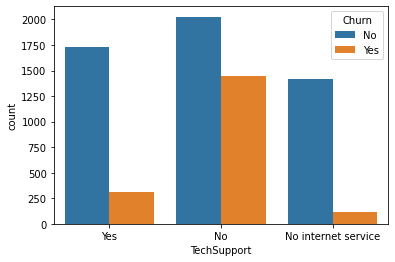

In [28]:
sns.countplot(x="TechSupport", hue="Churn", data=df);

c:\Users\Mauricio\anaconda3\envs\PycaretEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

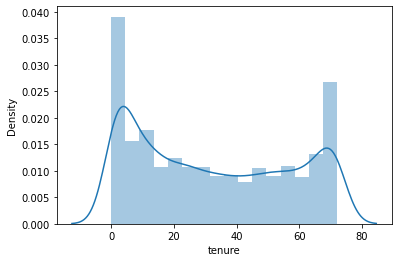

In [29]:
sns.distplot(df["tenure"])